## How Much do I use my Phone?

Towards the end of 2017, I started using an iOS app called [Moment](https://inthemoment.io/), which tracks how much time you spent on your phone each day and how many different times you pick it up as well. Through using this application for the year of 2018 and poking around in the app for a way to export my day-by-day data, I was able to obtain a [JSON file](https://github.com/rohan-varma/phone-usage-tracking/blob/master/data/moment.json) consisting of my phone usage time and number of pickups for every day of the year.

I decided to do some exploring to figure out just how much I've been using my phone on a daily basis, and see if there are any daily, weekly, or monthly differences - i.e. did I use my phone more on the weekends or on the weekdays? What follows is a Jupyter notebook that I created for analyzing this data and coming up with some interesting plots, as well as a bit of analysis. The code cells are collapsed so the reader can simply browse through the graphs and conclusions, but can be expanded if you're interested in the data munging needed to come up with the analysis.

In [1]:
# imports
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# a class to manage the phone usage data for a particular day
class Day:
    def __init__(self, day_dict):
        self.minutes = day_dict['minuteCount']
        self.pickups = day_dict['pickupCount']
        # get the date and save if it is a weekday or not
        self.date = day_dict['date'].split('T')[0]
        self.is_weekday = datetime.strptime(self.date, '%Y-%M-%d').weekday() < 5

    def __repr__(self):
        return 'minutes: {0}, pickups: {1}, date: {2}'.format(self.minutes, self.pickups, self.date)
    
    

In [2]:
# open and deserialize json, convert into day objects
with open('data/moment.json') as f:
	data = json.load(f)

day_data = next(iter(data.values()))
days = [Day(d) for d in day_data]
# filter out non 2018
days = [d for d in days if '2018' in d.date]

Here is what some of the raw JSON data coming from the Moment app looks like:

In [3]:
print(day_data[0])

{'pickupCount': 69, 'pickups': [], 'date': '2018-12-30T00:00:00+11:00', 'minuteCount': 181, 'appUsages': [], 'sessions': []}


To attempt to understand the overall data, we can find the mean and standard deviation of how many minutes per day I used my phone, as well as plot a histogram. 

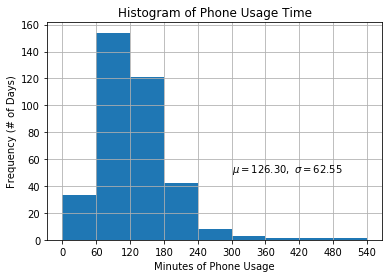

Between 0.0 and 1.0 hours of usage: 33 days
Between 1.0 and 2.0 hours of usage: 154 days
Between 2.0 and 3.0 hours of usage: 121 days
Between 3.0 and 4.0 hours of usage: 42 days
Between 4.0 and 5.0 hours of usage: 8 days
Between 5.0 and 6.0 hours of usage: 3 days
Between 6.0 and 7.0 hours of usage: 1 days
Between 7.0 and 8.0 hours of usage: 1 days
Between 8.0 and 9.0 hours of usage: 1 days


In [4]:
minute_data = [d.minutes for d in days]
mean_time, time_std = np.mean(minute_data), np.std(minute_data)
# hourly bins
bins = [i for i in range(0, max(minute_data) + 60, 60)]

# plot overall usage
n, bins, _ = plt.hist([minute_data], bins=bins)
plt.xlabel('Minutes of Phone Usage')
plt.xticks(bins)
plt.ylabel('Frequency (# of Days)')
plt.title('Histogram of Phone Usage Time')
plt.text(300, 50, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(mean_time, time_std))
plt.grid(True)
plt.show()

# hour-by-hour data
bin_ranges = [(bins[i], bins[i+1]) for i in range(len(bins)-1)]
hours_to_num_days = dict(zip(bin_ranges, n))
for k, v in sorted(hours_to_num_days.items()):
    print('Between {0} and {1} hours of usage: {2} days'.format(k[0]/60, k[1]/60, int(v)))


It looks like I spent an average of about 2 hours and 6 minutes on my phone each day, with a large standard deviation of 1 hour and 2 minutes. This is slightly lower than the average time per day spent on their phones by American adults, which comes in at 2 hours and 51 minutes (source: https://hackernoon.com/how-much-time-do-people-spend-on-their-mobile-phones-in-2017-e5f90a0b10a6). 

In other words, I spent about 8.75% of my entire day on my phone. If you only consider waking hours and assume 8 hours of sleep per day, then I spent about 13% of my waking hours using my phone each day. Translated to a year, this means I spent a whopping 766.25 hours on my phone in 2018, or 31.93 days - more than an entire month! 

Another interesting thing to look at is the variability in my phone usage. Most days, I was around one to three hours of phone usage per day - this accounts for about 75% of all days of the year. However, there were a couple days with more than 6+ hours of phone usage per day, which definitely increased the variability in my phone usage. Looking back, I think that this makes sense, as I do use my phone a lot on days when I'm traveling or on a road trip, or if I'm just really bored that day and don't feel like doing anything else. 

Let's look at some more data, such as whether there's a difference between weekdays and weekends.

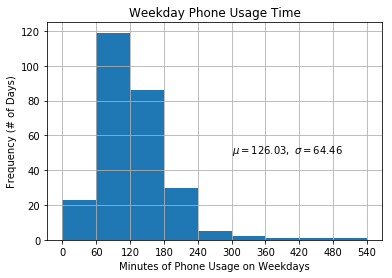

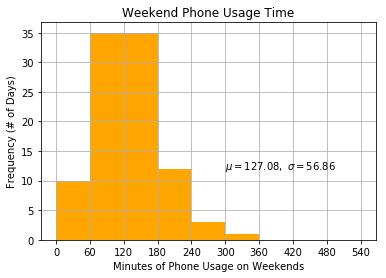

In [5]:
# separate weekdays and weekends, and plot each
weekdays, weekends = [d.minutes for d in days if d.is_weekday], [d.minutes for d in days if not d.is_weekday]
weekday_mean, weekend_mean = np.mean(weekdays), np.mean(weekends)
weekday_std, weekend_std = np.std(weekdays), np.std(weekends)

n, bins, _ = plt.hist(weekdays, bins=bins)
plt.xlabel('Minutes of Phone Usage on Weekdays')
plt.xticks(bins)
plt.ylabel('Frequency (# of Days)')
plt.title('Weekday Phone Usage Time')
plt.text(300, 50, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(weekday_mean, weekday_std))
plt.grid(True)
plt.show()

n, bins, _ = plt.hist(weekends, bins=bins, facecolor='orange')
plt.xlabel('Minutes of Phone Usage on Weekends')
plt.xticks(bins)
plt.ylabel('Frequency (# of Days)')
plt.title('Weekend Phone Usage Time')
plt.text(300, 12, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(weekend_mean, weekend_std))
plt.grid(True)


plt.show()


This was really interesting to me - the mean and standard deviations for my weekend and weekday phone usage is essentially the same, and the distributions take on basically the same shape, indicating that there's essentially no difference in my phone usage on a weekend or weekday. This ran counter to my hypothesis that I'd use my phone a lot more on weekends, as I have more time since I don't have class or work. Next, lets see if there's any particular difference in phone usage on different days of the week, different weeks, and different months.

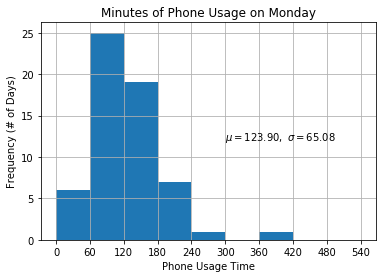

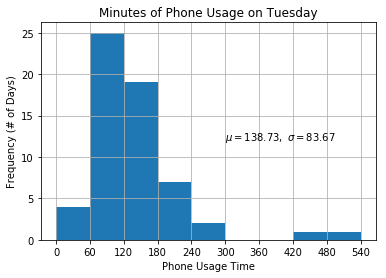

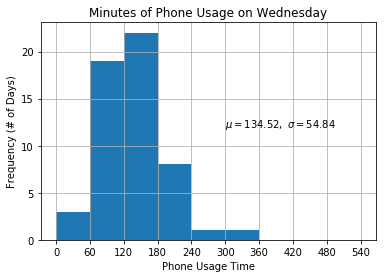

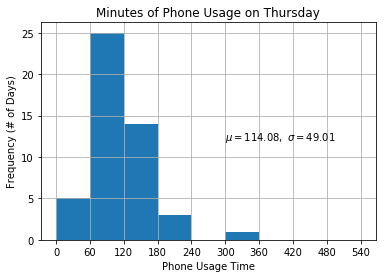

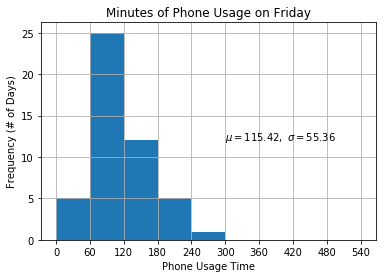

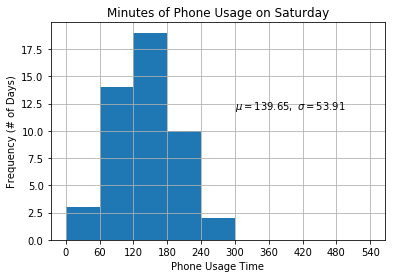

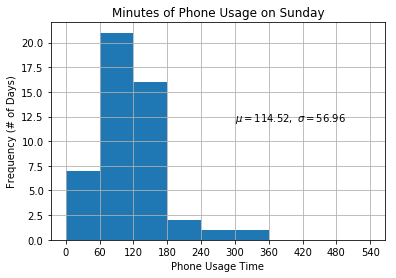

[123.89830508474576, 138.72881355932202, 134.5185185185185, 114.08333333333333, 115.41666666666667, 139.64583333333334, 114.52083333333333]


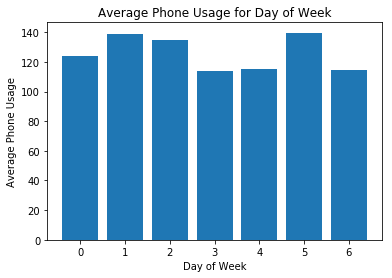

In [16]:
# separate each day of the week, and plot each.
mon = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 0]
tues = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 1]
wed = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 2]
thurs = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 3]
fri = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 4]
sat = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 5]
sun = [d.minutes for d in days if datetime.strptime(d.date, '%Y-%M-%d').weekday() == 6]

def plot(data, title):
    global bins
    n, bins, _ = plt.hist(data, bins=bins)
    plt.title(title)
    plt.xticks(bins)
    plt.ylabel('Frequency (# of Days)')
    plt.xlabel('Phone Usage Time')
    plt.text(300, 12, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(np.mean(data), np.std(data)))
    plt.grid(True)
    plt.show()

    
plot(data=mon, title='Minutes of Phone Usage on Monday')
plot(data=tues, title='Minutes of Phone Usage on Tuesday')
plot(data=wed, title='Minutes of Phone Usage on Wednesday')
plot(data=thurs, title='Minutes of Phone Usage on Thursday')
plot(data=fri, title='Minutes of Phone Usage on Friday')
plot(data=sat, title='Minutes of Phone Usage on Saturday')
plot(data=sun, title='Minutes of Phone Usage on Sunday')

# plot overall for mean comparison
means = [np.mean(x) for x in [mon, tues, wed, thurs, fri, sat, sun]]
print(means)
plt.bar(range(0,7), means)
plt.title('Average Phone Usage for Day of Week')
plt.ylabel('Average Phone Usage')
plt.xlabel('Day of Week')
plt.show()

We can see that there's a lot of similarity between the days of the weeks, though it looks like on average, I use my phone less on Thursdays, Fridays, and Sundays, while I use it comparatively more on Tuesdays, Wednesdays, and Saturdays. Overall though, we can see that each day's distribution is quite similar, taking on a mean of around two hours and a standard deviaton of around an hour. Let's examine weekly usage now.

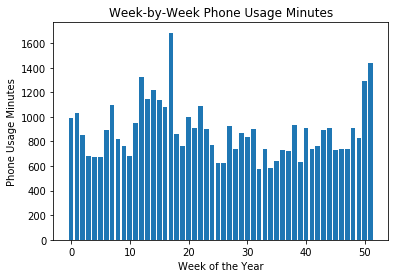

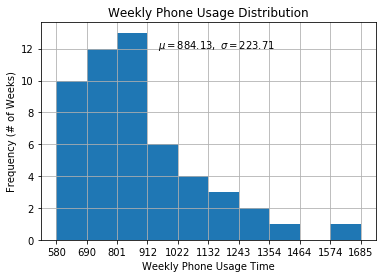

1685 minutes in highest-usage week, 580 minutes in lowest-usage week


In [51]:
# extract weeks from the year by sorting days and going by sevens
ordered_days = list(reversed(days))
weeks = [ordered_days[i:i+7] for i in range(0, len(ordered_days), 7)]
weekly_usages = [sum(d.minutes for d in week) for week in weeks]

# plot each week's usage in a bar graph
plt.bar([i for i in range(len(weekly_usages))],weekly_usages)
plt.xlabel('Week of the Year')
plt.ylabel('Phone Usage Minutes')
plt.title('Week-by-Week Phone Usage Minutes')
plt.show()

# plot weekly usage histogram
n, bins, _ = plt.hist(weekly_usages)
plt.title('Weekly Phone Usage Distribution')
plt.xticks(bins)
plt.ylabel('Frequency (# of Weeks)')
plt.xlabel('Weekly Phone Usage Time')
plt.text(950, 12, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(np.mean(weekly_usages), np.std(weekly_usages)))
plt.grid(True)
plt.show()

max_weekly, min_weekly = max(weekly_usages), min(weekly_usages)
print('{} minutes in highest-usage week, {} minutes in lowest-usage week'.format(max_weekly, min_weekly))

This is pretty interesting - it looks like my phone usage clustered around the 700-900 minute range for many weeks, with frequent spikes up to the 1100+ minute range in a couple of the weeks. My highest-usage week was a whopping 1685 minutes, which 28 hours, or more than an entire day of the week spent solely on my phone. Finally, let's move on to monthly usage.

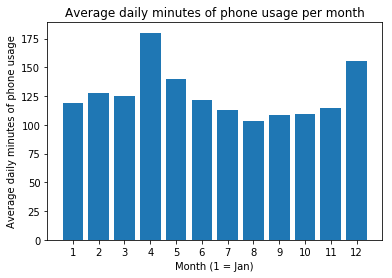

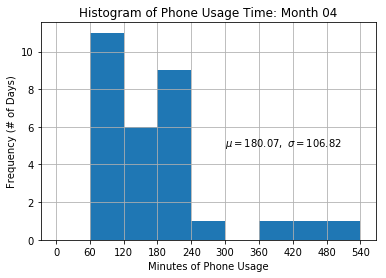

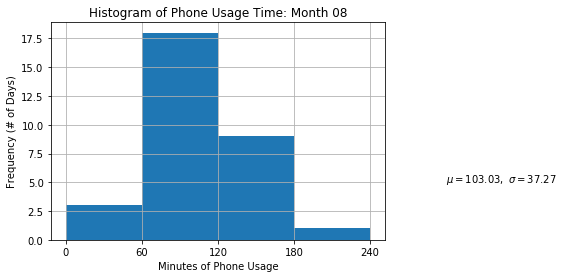

In [90]:
# parse months out of dates, and get those days corresponding to the month
months = list(set(["-".join(day.date.split("-")[0:2]) for day in ordered_days]))
month_to_days = {int(month.split("-")[1]): [day for day in ordered_days if month in day.date] for month in months}

# plot bar graph of monthly means
monthly_means = [np.mean([day.minutes for day in li]) for li in list(month_to_days.values())]
plt.bar(list(month_to_days.keys()), monthly_means)
plt.xlabel('Month (1 = Jan)')
plt.ylabel('Average daily minutes of phone usage')
plt.title('Average daily minutes of phone usage per month')
plt.xticks(list(range(1,13)))
plt.show()

# plot histograms of most and least used months.
most_use_month, least_use_month = np.argmax(monthly_means) + 1, np.argmin(monthly_means) + 1

most_use_days, least_use_days = month_to_days[most_use_month], month_to_days[least_use_month]
most_use_mins, least_use_mins = [day.minutes for day in most_use_days], [day.minutes for day in least_use_days]

def plot(month, mins):    
    bins = [i for i in range(0, max(mins) + 60, 60)]
    n, bins, _ = plt.hist(mins, bins)
    plt.xlabel('Minutes of Phone Usage')
    plt.xticks(bins)
    plt.ylabel('Frequency (# of Days)')
    plt.title('Histogram of Phone Usage Time: Month {0:02d}'.format(month))
    plt.text(300, 5, r'$\mu={0:.2f},\ \sigma={1:.2f}$'.format(np.mean(mins), np.std(mins)))
    plt.grid(True)
    plt.show()

plot(most_use_month, most_use_mins)
plot(least_use_month, least_use_mins)

It looks like my monthly phone usage was mostly consistent, usually hovering around the slightly above two hour mark, with a dip during the summer months and an increase during April and December. Over April, I used my phone for slightly over three hours a day on average (nearly 19% of my waking hours!) while using my phone for 1 hour and 43 minutes, or 10.7% of my waking hours, in the least-used month of August.

To be fair, the month of April had a large amount of variability, so the mean of 3 hours doesn't really reflect my usual usage that month: April contained all three of the outliers in the entire year, where I used my phone for more than 6 hours. Honestly, I'm not too sure what may have happened, I either left my phone on accidently at some points during the month or more realistically just wasted a lot of time on a couple of days. 

#### Concluding Remarks

The data indicates that I sure do use my phone a lot, and it occupies a pretty significant chunk of my waking hours on an average day. It doesn't really tell the full story though, since this data doesn't capture more granular information of whether I'm using my phone for more "useful" purposes such as necessary communication, calling a lyft/uber, getting directions, or talking/video chatting on the phone with someone, versus more typical time wasters (randomly checking social media for the 10000th+ time or just browsing around).

The overall takeaway for me is to think of my phone more as a tool, instead of as a distraction for when I'm bored. Phones and applications can be incredibly useful in keeping us connected with our friends and family, getting from place to place, learning new things, or capturing incredible moments, but can also take away from the present moment. 

In 2019, I'm going to make a conscious effort to simply note when I use my phone immediately when boredom presents itself, such as during a long car ride, waiting for an elevator, or even just walking from place to place. Hopefully, this will make me more mindful when I use my phone to distract myself from the present moment, and in time, I can learn to turn off this deeply ingrained habit. Here's to being more present in 2019.